In [8]:
import pandas as pd 
import matplotlib as plt
import scipy.stats as sts
import matplotlib.pyplot as plt 
import numpy as np
import csv

# Load in the csv
wildfire_data = "../data_files/California_Fire_Incidents.csv"

In [9]:
# Read the wildfire csv and display
fire_data = pd.read_csv(wildfire_data)

fire_data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [10]:
wildfire_df = fire_data[['AcresBurned', 'ArchiveYear', 'CountyIds', 'Counties', 'Latitude', 'Longitude']]
wildfire_df.head()

,AcresBurned,ArchiveYear,CountyIds,Counties,Latitude,Longitude
0,257314.0,2013,55,Tuolumne,37.857000,-120.086000
1,30274.0,2013,19,Los Angeles,34.585595,-118.423176
2,27531.0,2013,33,Riverside,33.709500,-116.728850
3,27440.0,2013,31,Placer,39.120000,-120.650000
4,24251.0,2013,56,Ventura,0.000000,0.000000


In [11]:
wildfire_df.to_csv('../data_files/wildfire_final.csv', index = False)

final_wildfire_data = "../data_files/wildfire_final.csv"

final_fire_data = pd.read_csv(final_wildfire_data)

final_fire_data.head()


,AcresBurned,ArchiveYear,CountyIds,Counties,Latitude,Longitude
0,257314.0,2013,55,Tuolumne,37.857000,-120.086000
1,30274.0,2013,19,Los Angeles,34.585595,-118.423176
2,27531.0,2013,33,Riverside,33.709500,-116.728850
3,27440.0,2013,31,Placer,39.120000,-120.650000
4,24251.0,2013,56,Ventura,0.000000,0.000000


In [12]:
# Create data frame from csv data

fireyear = final_fire_data['ArchiveYear']
acres = final_fire_data['AcresBurned']
lat = final_fire_data['Latitude']
lng = final_fire_data['Longitude']
county = final_fire_data['Counties']
countyid = final_fire_data['CountyIds']

fire_df = pd.DataFrame({
    'Year' : fireyear,
    'Acres Burned' : acres,
    'County' : county,
})

fire_df.head()

,Year,Acres Burned,County
0,2013,257314.0,Tuolumne
1,2013,30274.0,Los Angeles
2,2013,27531.0,Riverside
3,2013,27440.0,Placer
4,2013,24251.0,Ventura


In [31]:
fire_filtered = fire_df.groupby(['County', 'Year']).sum()

fire_filtered = pd.DataFrame(fire_filtered)
fire_filtered

Acres Burned
County  Year              
Alameda 2013         478.0
        2015        3340.0
        2016         211.0
        2017         537.0
        2018        1288.0
...                    ...
Yuba    2013          73.0
        2015         188.0
        2016         400.0
        2017       10981.0
        2019         268.0

[333 rows x 1 columns]

In [32]:
census_csv = '../data_files/drought_census_2010_2019.csv'

census_data = pd.read_csv(census_csv)

census_data.head()

,Unnamed: 0,Year,County,None,D0,D1,D2,D3,D4,Unnamed: 0.1,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,58,2010,Alameda County,84.000192,15.999808,2.624615,0.000000,0.0,0.0,35,1477980,36.2,69384,33961,165417,11.192100
1,59,2010,Alpine County,87.179423,12.820577,1.116154,0.000000,0.0,0.0,36,1176,40.9,63478,32159,145,12.329932
2,60,2010,Amador County,92.307692,7.692308,0.000000,0.000000,0.0,0.0,37,38327,47.2,54758,26329,2720,7.096825
3,61,2010,Butte County,70.173462,29.826538,6.780385,0.676346,0.0,0.0,38,218635,37.2,43170,23404,39290,17.970590
4,62,2010,Calaveras County,93.010000,6.990000,0.000000,0.000000,0.0,0.0,39,45994,48.5,54971,28408,3773,8.203244


In [33]:
# Create data frame from csv census

census_year = census_data['Year']
census_county = census_data['County']
census_poverty = census_data['Poverty Rate']

census_df = pd.DataFrame({
    'Year' : census_year,
    'County' : census_county,
    'Poverty Rate' : census_poverty
})

census_df.head()

,Year,County,Poverty Rate
0,2010,Alameda County,11.192100
1,2010,Alpine County,12.329932
2,2010,Amador County,7.096825
3,2010,Butte County,17.970590
4,2010,Calaveras County,8.203244


In [ ]:
# Remove the word 'County' from the County column

county_list = census_df.County.tolist()
county_list

In [ ]:
county_list = [x.rstrip('County') for x in county_list]
county_list

In [36]:
census_df.County = county_list
census_df.head()

,Year,County,Poverty Rate
0,2010,Alameda,11.192100
1,2010,Alpine,12.329932
2,2010,Amador,7.096825
3,2010,Butte,17.970590
4,2010,Calaveras,8.203244


In [37]:
census_filtered = census_df.groupby(['Year', 'County']).mean()

census_filtered = pd.DataFrame(census_filtered)
census_filtered.head()

Poverty Rate
Year County                  
2010 Alameda        11.192100
     Alpine         12.329932
     Amador          7.096825
     Butte          17.970590
     Calaveras       8.203244

In [38]:
# Merge two data frames

merged_df = pd.merge(fire_filtered, census_filtered, how = 'outer', on = ['Year', 'County'])
# merged_df = merged_df.loc[merged_df['Year']>2012]
# merged_df = merged_df.loc[merged_df['Year']<2020]
merged_df.dropna()
merged_df.head()

,,Acres Burned,Poverty Rate
Year,County,,
2013,Alameda,478.0,NaN
2015,Alameda,3340.0,NaN
2016,Alameda,211.0,NaN
2017,Alameda,537.0,NaN
2018,Alameda,1288.0,NaN


In [39]:
merged_df.to_csv('../data_files/wilfire_poverty.csv')
merged_df.head()

,,Acres Burned,Poverty Rate
Year,County,,
2013,Alameda,478.0,NaN
2015,Alameda,3340.0,NaN
2016,Alameda,211.0,NaN
2017,Alameda,537.0,NaN
2018,Alameda,1288.0,NaN


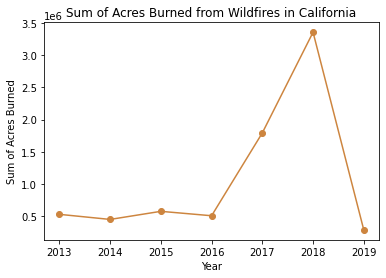

In [ ]:
# Used a pivot table to obtain the following values

year_data = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
sum_acres_burned = [527745, 448715, 574503, 505927, 1793915, 3358049, 285708]
 
x = year_data
y = sum_acres_burned

plt.title("Sum of Acres Burned from Wildfires in California")
plt.xlabel("Year")
plt.ylabel("Sum of Acres Burned")

plt.plot(x, y, marker = 'o', color = 'peru')
plt.savefig('../data_files/acres_burned.png')

In [ ]:
# https://www.statista.com/statistics/205434/poverty-rate-in-california/

poverty_data = "../data_files/Poverty_Rate_in_California.csv"

poverty_rate = pd.read_csv(poverty_data)

poverty_rate.head()

,Year,Poverty Rate in California
0,2013,16.8
1,2014,16.4
2,2015,15.3
3,2016,14.3
4,2017,13.3


In [ ]:
# Create data frame from csv data

year = poverty_rate['Year']
rate = poverty_rate['Poverty Rate in California']

poverty_df = pd.DataFrame({
    'Year' : year,
    'Poverty Rate' : rate
})

poverty_df

,Year,Poverty Rate
0,2013,16.8
1,2014,16.4
2,2015,15.3
3,2016,14.3
4,2017,13.3
5,2018,12.8
6,2019,11.8


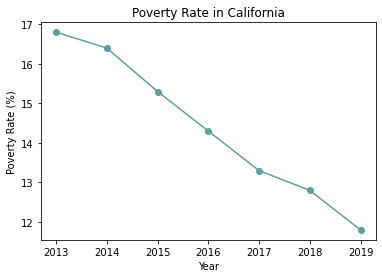

In [ ]:
x = poverty_df['Year']
y = poverty_df['Poverty Rate']

plt.title("Poverty Rate in California")
plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")

plt.plot(x, y, marker = 'o', color = 'cadetblue')
plt.savefig('../data_files/poverty_rate.png')